<a href="https://colab.research.google.com/github/Auusi/ProyectoBigData1/blob/main/proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Conectar Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carga de datos y limpieza del dataframe.

In [141]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from geopy.geocoders import Nominatim




In [65]:
ruta_de_archivos = '/content/drive/MyDrive/AAAUPSO'



ruta_de_archivos = '/content/drive/MyDrive/AAAUPSO'  # Definimos una variable "ruta_de_archivos" que almacena la ruta de la carpeta donde se encuentran los archivos a usar
archivos = os.listdir(ruta_de_archivos)  # La función os.listdir() obtiene una lista de los nombres de los archivos y son almacenados en la variable "archivos"

dataframes= {} # Creamos un diccionario vacío que se utilizará para almacenar DataFrames procesados más adelante

for archivo in archivos: # Recorremos cada archivo dentro de "archivos"
    if archivo.endswith('.csv'):  # Asegurarse de que solo se consideren archivos CSV
        mes = archivo.split('_')[3].split('.')[0]  # Obtener el nombre del archivo sin la extensión
        ruta_completa = os.path.join(ruta_de_archivos, archivo)  # Ruta completa al archivo         # ruta_completa = ruta_de_archivos + '/' + archivo
        df = pd.read_csv(ruta_completa)  # Cargar el archivo CSV en un DataFrame
        df_ventas = df.copy()

        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')


        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]

        df_ventas = df_ventas.dropna()  # Elimino todos los Nan y me quedo solo con los valores numericos

        df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)  # Transformo todos los valores numericos al tipo de dato int
        df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

        dataframes[mes] = df_ventas  # Agregar el DataFrame al diccionario usando el nombre del mes

#variable meses con los nombres en orden para poder ciclar en orden anual los dataframes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [66]:
def extraer_datos(datos):
  datos['Fecha de Pedido'] = pd.to_datetime(datos['Fecha de Pedido'])
  datos['Hora'] = datos['Fecha de Pedido'].dt.hour
  datos['Dia'] = datos['Fecha de Pedido'].dt.day
  return datos

## 1. Comportamiento de las ventas en los distintos meses:


### ● ¿Cómo variaron las ventas a lo largo de los diferentes meses?


In [107]:
# Creo listas para almacenar los totales de ventas y los nombres de los meses
totales_ventas = []


for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)

    total_ventas_mes = dataframe_mes['Cantidad Pedida'].count()
    totales_ventas.append(total_ventas_mes)


# Creo el objeto figura con el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=meses,
    y=totales_ventas,
    marker=dict(color=totales_ventas, colorscale = 'RdYlGn', colorbar=dict(title="Total de ventas", x=1.0, thickness=15)),  # Color y barra de colores
    text=totales_ventas,
    textposition='auto',  # Muestro el valor encima de las barras

))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Total de ventas por mes",
    xaxis=dict(title="Mes"),
    yaxis=dict(title="Total de ventas"),
)

fig.show()

### ● ¿Hubo algún mes que se destacó en términos de ventas?


Diciembre

### ● ¿Cuál es el ingreso total generado por mes?

In [68]:
ingreso_total_meses=[]
for mes in meses:
    dataframe_mes = dataframes[mes]
    ingresos_mes = dataframe_mes['Precio Unitario'].sum()
    ingreso_total_meses.append(ingresos_mes)

In [69]:
fig = go.Figure(data=[go.Bar(x=meses, y=ingreso_total_meses)])
fig.update_layout(title='Ingresos Totales por Mes', xaxis_title='Meses', yaxis_title='Ingresos Totales')

fig.show()

##2. Optimización de la publicidad y patrón de ventas por hora:


###● ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra?


In [108]:
Horas = list(range(24))

# Creo el objeto figura
fig = go.Figure()

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)  # Reemplaza esto con el procesamiento que necesites
    Ventas_por_hora = dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()



    # Agrego al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=Horas,
        y=Ventas_por_hora,
        mode='lines',
        name=mes,
        line=dict(width=2,shape='spline'),
    ))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Unidades vendidas por hora en diferentes meses",
    xaxis=dict(title="Hora", tickvals=Horas),
    yaxis=dict(title="Unidades vendidas", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()

###● ¿Cómo cambian los patrones de ventas por hora a lo largo del año?


In [109]:
Horas = list(range(24))

# Creo el objeto figura
fig = go.Figure()
horas_analizadas = [19, 12, 16]

for hora in horas_analizadas:
    total_productos_vendidos = []

    for mes in meses:
        dataframe_mes = dataframes[mes]
        dataframe_mes = extraer_datos(dataframe_mes)  # Reemplaza esto con el procesamiento que necesites

        ventas_hora = dataframe_mes[dataframe_mes['Hora'] == hora]

        # Calcular la cantidad total de productos vendidos para la hora actual
        total_productos_vendidos.append(ventas_hora['Cantidad Pedida'].count())

    # Agrego al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=meses,
        y=total_productos_vendidos,
        mode='lines',
        name=f'{hora} horas',
        line=dict(width=2, shape='spline'),
    ))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Unidades vendidas por hora",
    xaxis=dict(title="Meses", tickvals=Horas),
    yaxis=dict(title="Unidades vendidas", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()

###● ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad en los distintos meses?

En las horas de mayor actividad (12 y 19) se puede observar una correlacion casi directa durante todo el año, con una minima discrepancia entre los meses de febrero y abril

## 3. Distribución de ventas por ubicación:


### ● ¿En qué ciudades se han registrado las mayores ventas?


In [110]:
resumen_por_ciudad = pd.DataFrame(columns=["Ciudad", "Cantidad Pedida"])
for mes in meses:
    dataframe_mes = dataframes[mes]

    # Divide la columna "Dirección de Envío" en función de las comas y extrae la ciudad
    direccion_split = dataframe_mes["Dirección de Envio"].str.split(',')
    dataframe_mes["Ciudad"] = direccion_split.str[1].str.strip()

    # Realiza un groupby por ciudad y suma la columna "Cantidad Pedida" para el mes actual
    resumen_mes = dataframe_mes.groupby("Ciudad")["Cantidad Pedida"].count().reset_index()

    resumen_por_ciudad = pd.concat([resumen_por_ciudad, resumen_mes], ignore_index=True)

resumen_anual_ciudades = resumen_por_ciudad.groupby("Ciudad")["Cantidad Pedida"].sum().reset_index()

La siguiente celda a veces hay que ejecutarla de nuevo debido a un problema con el tiempo de respuesta.


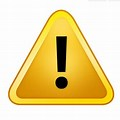

In [111]:
resumen_anual_ciudades["Cantidad Pedida"] = pd.to_numeric(resumen_anual_ciudades["Cantidad Pedida"])


# Crea un objeto geocoder de Nominatim
geolocator = Nominatim(user_agent="mi_aplicacion")

latitudes = []
longitudes = []

# Utiliza geopy para obtener las coordenadas de las ciudades
for ciudad in resumen_anual_ciudades['Ciudad']:
    location = geolocator.geocode(ciudad)

    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        # Si no se encuentra la ubicación
        latitudes.append(None)
        longitudes.append(None)



fig = px.scatter_geo(
    resumen_anual_ciudades,
    lon=longitudes,
    lat=latitudes,
    text='Ciudad',
    size='Cantidad Pedida',
    color='Cantidad Pedida',
    color_continuous_scale='inferno',
    opacity=0.7,
    hover_name='Ciudad',
    projection='mercator',
 )


fig.update_geos(
    lonaxis_range=[-130, -60],
    lataxis_range=[24, 50],
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",

)


fig.update_layout(
    title='Cantidad Pedida por Ciudades',
    geo=dict(
        showocean=True,
        oceancolor="LightBlue",
    ),
    coloraxis_colorbar=dict(title='Cantidad Pedida'),
)


fig.show()



### ● ¿Cómo se comparan las ventas en diferentes estados o regiones?



In [112]:

resumen_por_estado = pd.DataFrame(columns=["Estado", "Cantidad Pedida"])
for mes in meses:
    dataframe_mes = dataframes[mes]

    # Divide la columna "Dirección de Envío" en función de las comas y extrae el Estado
    direccion_split = dataframe_mes["Dirección de Envio"].str.split(',')
    dataframe_mes["Estado"] = direccion_split.str[2].str.strip()

    # Realiza un groupby por estado y suma la columna "Cantidad Pedida" para el mes actual
    resumen_mes = dataframe_mes.groupby("Estado")["Cantidad Pedida"].count().reset_index()

    resumen_por_estado = pd.concat([resumen_por_estado, resumen_mes], ignore_index=True)

    resumen_anual_estado = resumen_por_estado.groupby("Estado")["Cantidad Pedida"].sum().reset_index()


In [113]:

resumen_anual_estado[['Abreviatura', 'Código Postal']] = resumen_anual_estado['Estado'].str.split(' ', 1, expand=True)
resumen_agrupado = resumen_anual_estado.groupby('Abreviatura')['Cantidad Pedida'].sum().reset_index()
fig = px.choropleth(resumen_agrupado, locations='Abreviatura', locationmode="USA-states", scope="usa", color='Cantidad Pedida', color_continuous_scale='RdYlGn',title='Total Sales by State')
fig.show()

<ipython-input-113-c6fef37bfb65>:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



####Para los estados probamos con muchas API gratuitas que les das el Codigo postal y te devuelve las cordenadas,la que mejor funciono fue OpenStreetMap; Aun asi hay algunos CP que no los encontro.
Dejamos comentado una alternativa con esa opcion:

In [ ]:
#-------------------------------------------------------------------
# import requests
# def obtener_coordenadas(codigo_postal):
#     # URL de la API de Nominatim (OpenStreetMap)
#     url = f"https://nominatim.openstreetmap.org/search?postalcode={codigo_postal}&countrycodes=US&format=json&limit=1"

#     response = requests.get(url)

#     if response.status_code == 200:
#         data = response.json()
#         if data:
#             lat = float(data[0]['lat'])
#             lon = float(data[0]['lon'])
#             return lat, lon
#     return None

# latitudes = []
# longitudes = []
# codigos_postales = [estado.split()[1] for estado in resumen_anual_estado['Estado']]

# # Utiliza la función para obtener las coordenadas
# for codigo_postal in codigos_postales:
#     coordenadas = obtener_coordenadas(codigo_postal)
#     if coordenadas:
#         latitudes.append(coordenadas[0])
#         longitudes.append(coordenadas[1])
#     else:
#         latitudes.append(None)
#         longitudes.append(None)


# resumen_anual_estado['Latitud'] = latitudes
# resumen_anual_estado['Longitud'] = longitudes


# resumen_anual_estado["Cantidad Pedida"] = pd.to_numeric(resumen_anual["Cantidad Pedida"])


# fig = go.Figure()

# fig.add_trace(
#     go.Scattergeo(
#         lon=resumen_anual_estado['Longitud'],
#         lat=resumen_anual_estado['Latitud'],
#         text=resumen_anual_estado['Estado'],
#         mode='markers',
#         marker=dict(
#             size=resumen_anual_estado['Cantidad Pedida'] / 1000,
#             opacity=0.7,
#             colorscale='Viridis',
#             color=resumen_anual_estado['Cantidad Pedida'],
#             colorbar=dict(title='Cantidad Pedida')
#         )
#     )
# )

# fig.update_geos(
#     projection_type="mercator",
#     showcoastlines=True,
#     coastlinecolor="Black",
#     showland=True,
#     landcolor="white",
# )

# fig.update_layout(
#     title='Cantidad Pedida por Estados',
#     geo=dict(
#         scope="world",  # Ajusta el alcance del mapa a Estados Unidos
#         showocean=True,
#         oceancolor="LightBlue",
#     )
# )


# fig.show()

### ● ¿Existe variación en las ventas por estado a lo largo de los meses?


In [114]:
resumen_total = pd.DataFrame(columns=["Mes", "Estado", "Cantidad Pedida"])

for mes in meses:
    dataframe_mes = dataframes[mes]
    # Divide la columna "Dirección de Envío" en función de las comas y extrae el Estado
    direccion_split = dataframe_mes["Dirección de Envio"].str.split(',')
    dataframe_mes["Estado"] = direccion_split.str[2].str.strip()


    dataframe_mes["Mes"] = mes

    # Concatena el dataframe_mes al DataFrame resumen_total
    resumen_total = pd.concat([resumen_total, dataframe_mes], ignore_index=True)


resumen_total['Mes'] = pd.Categorical(resumen_total['Mes'], categories=meses, ordered=True) #hago que la columnna mes sea una columna categorizada segun los meses en orden,
                                                                                            #sino el groupby ordena los meses en orden alfabetico
resumen_total = resumen_total.groupby(["Estado","Mes"])["Cantidad Pedida"].count().reset_index()


In [115]:
resumen_total['Cantidad Pedida'] = pd.to_numeric(resumen_total['Cantidad Pedida'], errors='coerce')

fig = go.Figure()

for estado in resumen_total['Estado'].unique():  # Itera a través de cada estado UNICO en la columna "Estado" del DataFrame resumen_total
    df_estado = resumen_total[resumen_total['Estado'] == estado]   #Crea un nuevo DataFrame llamado "df_estado" con filas correspondientes al ESTADO ACTUAL
    fig.add_trace(
        go.Scatter(
            x=meses,
            y=[estado] * len(df_estado),
            mode='markers',
            marker=dict(
                size=df_estado['Cantidad Pedida']/100,
                opacity=0.8,
                line=dict(width=0.5, color='DarkSlateGrey')
            ),
            name=estado
        )
    )


fig.update_layout(
    title='Diferencia de Ventas por Mes y Estado',
    xaxis=dict(title='Mes'),
    yaxis=dict(title='Estado'),
    showlegend=True
)

fig.show()

##4. Análisis del producto más vendido:


###● ¿Cuál es el producto más vendido en general y en cada mes?


In [116]:
meses_mas_vendidos = []
productos_mas_vendidos = []
cantidades_mas_vendidas = []


for mes in meses:
    dataframe_mes = dataframes[mes]

    ventas_por_producto = dataframe_mes.groupby("Producto")["Cantidad Pedida"].sum()

    producto_mas_vendido = ventas_por_producto.idxmax()
    cantidad_mas_vendida = ventas_por_producto.max()

    meses_mas_vendidos.append(mes)
    productos_mas_vendidos.append(producto_mas_vendido)
    cantidades_mas_vendidas.append(cantidad_mas_vendida)

In [117]:
marker_color = 'dodgerblue'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=meses_mas_vendidos,
    y=cantidades_mas_vendidas,
    text=[''] * len(meses_mas_vendidos),
    hovertext=productos_mas_vendidos,
    fill='tozeroy',
    mode='lines+markers',
    line=dict(color=marker_color, width=3),
    marker=dict(size=10, color=marker_color, line=dict(width=2, color='white')),
    hoverinfo='x+y+text',
))


fig.update_layout(
    title='Cantidades Vendidas por Mes del Producto más Vendido',
    xaxis=dict(title='Meses', showgrid=False),
    yaxis=dict(title='Cantidad Vendida', showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
)


fig.show()

###● ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

Uno de los factores es que las baterias AAA son un articulo desechable que es normal que se renueve frecuentemente,
tambien el bajo precio en comparacion con otros articulos contribuye a la cantidad de ventas.

##5. Tendencia ventas:


###● ¿Existe alguna tendencia o patrón en las ventas que se repita a lo largo de los días en los diferentes meses?


In [120]:
Dias = list(range(1, 32))

data = []

for mes in meses:
    dataframe_mes = dataframes[mes]
    Ventas_por_dia = dataframe_mes.groupby('Dia')['Cantidad Pedida'].count().tolist()
    data.append(Ventas_por_dia)

fig = go.Figure(data=go.Heatmap(
    z=data,
    x=Dias,
    y=meses,
    customdata=data,  # Establecer los datos personalizados como la misma matriz de datos
    hovertemplate='Día: %{x}<br>Mes: %{y}<br>Cantidad Pedida: %{customdata}<extra></extra>',
    colorscale='Viridis',  # Puedes elegir otra escala de colores
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Unidades vendidas por Día en diferentes meses",
)

fig.show()

In [121]:

dataFrameAnio = pd.DataFrame()

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = dataframe_mes.sort_values(by=['Dia'])
    # Concatenar los dataframes
    dataFrameAnio = pd.concat([dataFrameAnio, dataframe_mes], ignore_index=True)

#Función para calcular el día de la semana
def calcular_dia_semana(fecha_pedido):
    return fecha_pedido.strftime("%A")

 #Aplicar la función para calcular el día de la semana y agregarlo como una nueva columna
dataFrameAnio['Dia de la Semana'] = dataFrameAnio['Fecha de Pedido'].apply(calcular_dia_semana)




###● ¿Cómo varían las ventas a lo largo de los diferentes días de la semana?


In [122]:
ventas_por_dia_semana = dataFrameAnio.groupby('Dia de la Semana')['Cantidad Pedida'].count()

fig = go.Figure(data=[go.Pie(labels=ventas_por_dia_semana.index, values=ventas_por_dia_semana,)])

fig.update_layout(
    title='Distribución de Ventas por Día de la Semana',
)

fig.show()

###● ¿Se observa alguna diferencia significativa en las ventas entre los días laborables y los fines de semana?

No.

##6. Impacto de eventos especiales en las ventas:


###● ¿Se ha observado algún aumento o disminución significativa en las ventas en días cercanos a eventos especiales, como días festivos?


In [146]:


# Filtrar las fechas de interés
fechas_interesantes = pd.date_range(start='2019-07-01', end='2019-07-07', freq='D')  # Cambia las fechas según tus días festivos y establece la frecuencia 'D' para días
# Filtrar el DataFrame para incluir solo las filas correspondientes a las fechas de interés
ventas_interesantes = dataFrameAnio[dataFrameAnio['Fecha de Pedido'].dt.floor('D').isin(fechas_interesantes)]
ventas_interesantes = ventas_interesantes.groupby(ventas_interesantes['Fecha de Pedido'].dt.date)['Cantidad Pedida'].count().reset_index()



fechas_interesantes2 = pd.date_range(start='2019-12-21', end='2019-12-28', freq='D')
ventas_interesantes2 = dataFrameAnio[dataFrameAnio['Fecha de Pedido'].dt.floor('D').isin(fechas_interesantes2)]
ventas_interesantes2 = ventas_interesantes2.groupby(ventas_interesantes2['Fecha de Pedido'].dt.date)['Cantidad Pedida'].count().reset_index()


fechas_interesantes3 = pd.date_range(start='2019-02-11', end='2019-02-17', freq='D')
ventas_interesantes3 = dataFrameAnio[dataFrameAnio['Fecha de Pedido'].dt.floor('D').isin(fechas_interesantes3)]
ventas_interesantes3 = ventas_interesantes3.groupby(ventas_interesantes3['Fecha de Pedido'].dt.date)['Cantidad Pedida'].count().reset_index()


In [154]:
# import plotly.graph_objs as go

# # Crear un gráfico de líneas para la primera semana
# fig_semana1 = go.Figure()
# fig_semana1.add_trace(go.Scatter(x=ventas_interesantes['Fecha de Pedido'], y=ventas_interesantes['Cantidad Pedida'], mode='lines', name='Semana 1', marker_color='blue'))
# fig_semana1.update_layout(
#     title='Variación de Ventas Previo al 4 de Julio',
#     xaxis=dict(title='Fecha de Pedido'),
#     yaxis=dict(title='Cantidad Pedida'),
# )

# # Crear un gráfico de líneas para la segunda semana
# fig_semana2 = go.Figure()
# fig_semana2.add_trace(go.Scatter(x=ventas_interesantes2['Fecha de Pedido'], y=ventas_interesantes2['Cantidad Pedida'], mode='lines', name='Semana 2', marker_color='orange'))
# fig_semana2.update_layout(
#     title='Variación de Ventas Previo Navidad',
#     xaxis=dict(title='Fecha de Pedido'),
#     yaxis=dict(title='Cantidad Pedida'),
# )

# # Crear un gráfico de líneas para la tercera semana
# fig_semana3 = go.Figure()
# fig_semana3.add_trace(go.Scatter(x=ventas_interesantes3['Fecha de Pedido'], y=ventas_interesantes3['Cantidad Pedida'], mode='lines', name='Semana 3', marker_color='green'))
# fig_semana3.update_layout(
#     title='Variación de Ventas Previo San Valentin',
#     xaxis=dict(title='Fecha de Pedido'),
#     yaxis=dict(title='Cantidad Pedida'),
# )


# # Mostrar los gráficos por separado
# fig_semana1.show()
# fig_semana2.show()
# fig_semana3.show()


# Crear un gráfico de líneas para la primera semana
fig_semana1 = go.Figure()
fig_semana1.add_trace(go.Scatter(x=ventas_interesantes['Fecha de Pedido'], y=ventas_interesantes['Cantidad Pedida'], mode='lines', name='Semana 1', marker_color='blue'))
fig_semana1.update_layout(
    title='Variación de Ventas Previo al 4 de Julio',
    xaxis=dict(title='Fecha de Pedido'),
    yaxis=dict(title='Cantidad Pedida'),
)

# Crear un gráfico de líneas para la segunda semana
fig_semana2 = go.Figure()
fig_semana2.add_trace(go.Scatter(x=ventas_interesantes2['Fecha de Pedido'], y=ventas_interesantes2['Cantidad Pedida'], mode='lines', name='Semana 2', marker_color='orange'))
fig_semana2.update_layout(
    title='Variación de Ventas Previo Navidad',
    xaxis=dict(title='Fecha de Pedido'),
    yaxis=dict(title='Cantidad Pedida'),
)

# Crear un gráfico de líneas para la tercera semana
fig_semana3 = go.Figure()
fig_semana3.add_trace(go.Scatter(x=ventas_interesantes3['Fecha de Pedido'], y=ventas_interesantes3['Cantidad Pedida'], mode='lines', name='Semana 3', marker_color='green'))
fig_semana3.update_layout(
    title='Variación de Ventas Previo San Valentín',
    xaxis=dict(title='Fecha de Pedido'),
    yaxis=dict(title='Cantidad Pedida'),
)

# Crear subplots en dos filas y una columna
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.2)

# Agregar los gráficos a las subtramas
fig.add_trace(fig_semana1.data[0], row=1, col=1)
fig.add_trace(fig_semana2.data[0], row=1, col=2)
fig.add_trace(fig_semana3.data[0], row=2, col=1)

# Actualizar los títulos y etiquetas
fig.update_layout(
    title='Variación de Ventas',
    xaxis=dict(title='Fecha de Pedido'),
    yaxis=dict(title='Cantidad Pedida'),
)

# Mostrar el gráfico combinado en dos filas
fig.show()

###● ¿Qué eventos específicos han tenido un impacto notable en el comportamiento de las ventas y cómo se manifestó ese impacto?

##Pregunta Adicional



###Además de las preguntas mencionadas anteriormente, te invito a pensar en una pregunta adicional que podría ser relevante para analizar los datos de ventas mensuales. Esta pregunta debe estar basada en la información que se proporciona en los conjuntos de datos. Puede estar relacionada con tendencias, comparaciones, patrones o cualquier otro aspecto que despierte tu interés. Trata de ser creativo/a y pensar en cómo podrías explorar aún más estos datos!

In [ ]:

def asignar_estacion(mes):
    if mes in ['Enero', 'Febrero', 'Marzo']:
        return 'Verano'
    elif mes in ['Abril', 'Mayo', 'Junio']:
        return 'Otoño'
    elif mes in ['Julio', 'Agosto', 'Septiembre']:
        return 'Invierno'
    else:
        return 'Primavera'

# Crear un DataFrame para almacenar los datos de estaciones y meses
estaciones_meses = pd.DataFrame(columns=['Estacion', 'Mes', 'Cantidad Pedida'])

# Recorre los DataFrames por mes y agrupa los datos por estación y mes
for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes['Estacion'] = dataframe_mes['Mes'].apply(asignar_estacion)
    estacion_data = dataframe_mes.groupby(['Estacion', 'Mes'])['Cantidad Pedida'].count().reset_index()
    estaciones_meses = estaciones_meses.append(estacion_data, ignore_index=True)

# Agrupa los datos por estación y mes para obtener la suma total de cantidades pedidas
estaciones_meses_totales = estaciones_meses.groupby(['Estacion', 'Mes'])['Cantidad Pedida'].sum().reset_index()


In [132]:

# Diccionario que asigna colores a cada estación
colores_estaciones = {
    'Invierno': 'lightblue',
    'Otoño': 'brown',
    'Primavera': 'lightgreen',
    'Verano': 'orange',
}

# Asigna un color a cada fila en el DataFrame basado en la columna 'Estacion'
estaciones_meses_totales['Color'] = estaciones_meses_totales['Estacion'].map(colores_estaciones)

fig = px.sunburst(
    estaciones_meses_totales,
    path=['Estacion', 'Mes'],  # Jerarquía de datos, primero Estacion y luego Mes
    values='Cantidad Pedida',  # Valores para determinar el tamaño de las secciones
    color='Estacion',
    color_discrete_map=colores_estaciones,  # Mapea las estaciones a colores
)


fig.update_layout(
    title='Cantidad Pedida por Estación y Mes',
)

fig.update_traces(
    hovertemplate='<b>Cantidad Pedida:</b> %{value}<extra></extra>',
)

# Ocultar la barra de colores y la referencia
fig.update_coloraxes(showscale=False)

fig.show()